In [1]:
# in case someone couldn't compute an actual kinship matrix.
# it would still be better than nothing to use a block diagonal matrix encoding repeat observations (cells)
# here I work out what (expanded) hK looks like in this case (K is just the identity with no relatedness info)
# and build a function to obtain such an hK to input into CellRegMap

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array, split, cumsum, zeros, append
import itertools

In [115]:
# toy example with 3,2,4 cells respectively for 3 donors
data = [['donor1', 'cell1'], ['donor1', 'cell2'], ['donor1', 'cell3'],
       ['donor2', 'cell4'],['donor2', 'cell5'],
       ['donor3', 'cell6'],['donor3', 'cell7'],['donor3', 'cell8'],['donor3', 'cell9']]
 
# Create the pandas DataFrame
smf_df = pd.DataFrame(data, columns = ['donor', 'cell'])

In [116]:
smf_df.head()

,donor,cell
0,donor1,cell1
1,donor1,cell2
2,donor1,cell3
3,donor2,cell4
4,donor2,cell5


In [128]:
def get_groups_from_smf(smf_df):
    n_samples = smf_df.shape[0]
    donors = smf_df['donor'].unique()
    n_donors = len(donors)
    n_cells = array([],dtype=int)
    for donor in donors:
        n_cells = append(n_cells, array(smf_df[smf_df['donor']==donor].shape[0], dtype=int))
    groups = split(range(n_samples), cumsum(n_cells))[:-1]
    return groups

In [129]:
def get_block_hK_from_groups(groups):
    n_samples = len(list(itertools.chain.from_iterable(groups)))
    hM = zeros((n_samples, len(groups)))
    for i, idx in enumerate(groups):
        hM[idx, i] = 1.0
    return hM

In [130]:
# indices for each group of cells (group=individual)
groups = get_groups_from_smf(smf_df)
groups

[array([0, 1, 2]), array([3, 4]), array([5, 6, 7, 8])]

In [131]:
hK = get_block_hK_from_groups(groups)

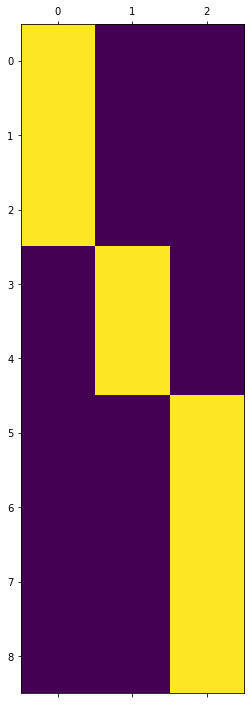

In [132]:
plt.matshow(hK)

In [133]:
K = hK @ hK.T

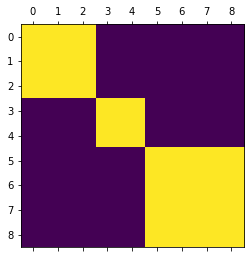

In [134]:
plt.matshow(K)